# Downloading Dataset

In [1]:
# link for training dataset

!wget -O myntra_train.zip https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/myntra_train.zip

--2022-02-07 07:17:10--  https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/myntra_train.zip
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.156.55
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.156.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87508395 (83M) [application/x-zip-compressed]
Saving to: ‘myntra_train.zip’

myntra_train.zip    100%[===================>]  83.45M  11.9MB/s    in 8.7s    

2022-02-07 07:17:19 (9.64 MB/s) - ‘myntra_train.zip’ saved [87508395/87508395]



In [2]:
!unzip -q myntra_train.zip

# Importing Libraries

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from sklearn.neighbors import NearestNeighbors

# Loading Dataset

In [4]:
train_dir = '/content/train'
img_size = 224
batch_size = 64

img_gen_train = ImageDataGenerator(preprocessing_function = preprocess_input)
train_datagen = img_gen_train.flow_from_directory(train_dir,  #path to the parent folder
                                      target_size = (img_size, img_size), #size of the input image
                                      batch_size = batch_size, #size of the batches of data
                                      class_mode = None, #weather you want binary classes or categorical
                                      shuffle = False)

Found 3068 images belonging to 10 classes.


## Loading ResNet50

In [5]:
model = ResNet50(weights = 'imagenet', 
                 include_top = False,
                 input_shape = (img_size, img_size, 3),
                 pooling = 'max')

94781440/94765736 [==============================] - 0s 0us/step


# Generating Product attributes (Features)

In [6]:
feature_list = model.predict(train_datagen)

In [7]:
# Get full path for all the images in our dataset

filenames = [train_dir + '/' + s for s in train_datagen.filenames]

# Using KNN on Product Features

In [8]:
(x2-x1 ^2 - y2-y1^2  )^ 1/2

NameError: ignored

In [9]:
neighbors = NearestNeighbors(n_neighbors = 3,
                             algorithm='ball_tree',
                             metric = 'euclidean')

neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', metric='euclidean', n_neighbors=3)

# Image Search

In [10]:
# Downloading test images

!wget -O test1.jpg https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test1.jpg
!wget -O test2.jpg https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test2.jpg
!wget -O test3.jpg https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test3.jpg

--2022-02-07 07:18:34--  https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test1.jpg
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.158.75
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.158.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18807 (18K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>]  18.37K  76.6KB/s    in 0.2s    

2022-02-07 07:18:35 (76.6 KB/s) - ‘test1.jpg’ saved [18807/18807]

--2022-02-07 07:18:35--  https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test2.jpg
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.158.75
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.158.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19551 (19K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>]

In [15]:
#Pre-processing Image

img_path = 'test3.jpg'
input_shape = (img_size, img_size, 3) #Setting image size

img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1])) #Resizing image
img_array = image.img_to_array(img) #Converting it to an array
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)

In [16]:
#Predicting similar images

test_img_features = model.predict(preprocessed_img, batch_size = 1)

_, indices = neighbors.kneighbors(test_img_features)

In [17]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

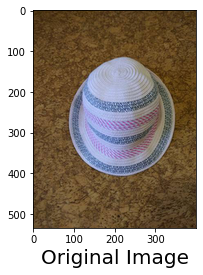

Predictions for the Image 


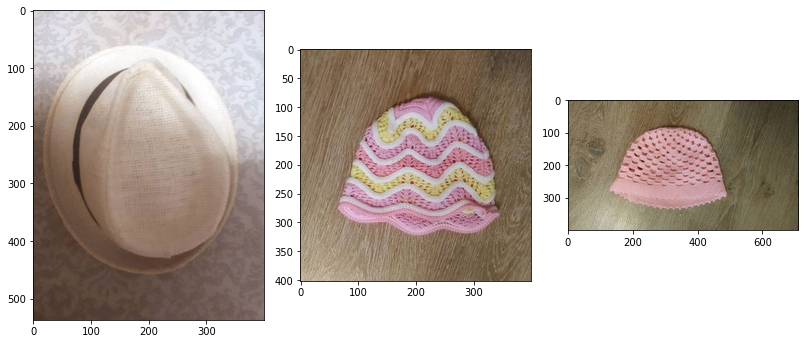

In [18]:
plt.imshow(mpimg.imread(img_path), interpolation = 'lanczos')
plt.xlabel('Original Image',fontsize = 20)
plt.show()
print('Predictions for the Image ')
similar_images(indices[0])

In [ ]:
Feedback Link: https://www.techlearn.live/feedback?scheduleId=6121382fec11f12901676d0c
Notebook - https://drive.google.com/file/d/1c3KDLuTV_E1x5YDw0t10lohjLkxZxjVY/view?usp=sharing
Code Link - https://colab.research.google.com/drive/1butXWiwJuefUbvjfqAomL6PoVMmXgmlb?usp=sharing

# support@techlearn.live